In [2]:
#l'import des bib utiles
import feedparser
import pandas as pd
import numpy as np


#si besoin, il faut installer huggingface_hub, tranformers et torch
#!pip install huggingface_hub
#!pip install transformers
#!pip install torch

In [4]:
rss_url = "https://www.ouest-france.fr/rss/une"

feed_of_une = feedparser.parse(rss_url)
feed_of_une.entries[:5]

[{'title': 'Désinformation climatique\xa0: une étude inédite pointe les manquements dans l’audiovisuel français',
  'title_detail': {'type': 'text/plain',
   'language': None,
   'base': 'https://www.ouest-france.fr/rss/une',
   'value': 'Désinformation climatique\xa0: une étude inédite pointe les manquements dans l’audiovisuel français'},
  'links': [{'rel': 'alternate',
    'type': 'text/html',
    'href': 'https://www.ouest-france.fr/medias/desinformation-climatique-une-etude-inedite-pointe-les-manquements-dans-laudiovisuel-francais-0c4b0676-15de-11f0-9759-9654df6b878b?utm_source=fluxpublicactu&utm_medium=fluxrss&utm_campaign=banquedecontenu'},
   {'length': '37785',
    'type': 'image/jpeg',
    'href': 'https://media.ouest-france.fr/v1/pictures/MjAyNTA0NTRkZjhmMTk5ZTVmMDFjMTZiZmQ5MTcyMmNlMTU2OGU?width=320&height=240&focuspoint=50%2C25&cropresize=1&client_id=bpeditorial&sign=af0b843d682174cb64811aee060169a3a8c92c47ad6818f6093c1bd555d74a0c',
    'rel': 'enclosure'}],
  'link': 'http

In [6]:
articles= []

for entry in feed_of_une.entries:
    articles.append({
        "titre": entry.title,
        "lien": entry.link,
        "date de publication": entry.published
    })

df_articles = pd.DataFrame(articles)
df_articles.head()

,titre,lien,date de publication
0,Désinformation climatique : une étude inédite ...,https://www.ouest-france.fr/medias/desinformat...,"Thu, 10 Apr 2025 12:12:54 GMT"
1,"Suicide d’Evaëlle, 11 ans, en 2019 : poursuivi...",https://www.ouest-france.fr/societe/justice/su...,"Thu, 10 Apr 2025 12:04:38 GMT"
2,"Location, vente, partage des parts… Que faire ...",https://www.ouest-france.fr/societe/logement/l...,"Thu, 10 Apr 2025 12:01:04 GMT"
3,Tennis. La phase finale de Billie Jean King Cu...,https://www.ouest-france.fr/sport/tennis/tenni...,"Thu, 10 Apr 2025 11:59:28 GMT"
4,Effondrement d’une discothèque en République d...,https://www.ouest-france.fr/monde/republique-d...,"Thu, 10 Apr 2025 11:57:13 GMT"


In [48]:
from transformers import pipeline
import os
hf_token = os.getenv("HF_TOKEN")

classifier = pipeline("sentiment-analysis",
                      model="ac0hik/Sentiment_Analysis_French", 
                      token=hf_token)  # Utilisation du paramètre token au lieu de use_auth_token
exemple_titre = df_articles['titre'][0]
print(classifier(exemple_titre))

Device set to use cpu


[{'label': 'negative', 'score': 0.9297462105751038}]


In [50]:
sentiment = []
score = []
for index, row in df_articles.iterrows():
    titre = row['titre']
    resultat = classifier(titre)[0]
    sentiment.append(resultat['label'])
    score.append(resultat['score'])

df_articles['sentiment']=sentiment
df_articles['score']=score

df_articles.head()

,titre,lien,date de publication,sentiment,score
0,Désinformation climatique : une étude inédite ...,https://www.ouest-france.fr/medias/desinformat...,"Thu, 10 Apr 2025 12:12:54 GMT",negative,0.929746
1,"Suicide d’Evaëlle, 11 ans, en 2019 : poursuivi...",https://www.ouest-france.fr/societe/justice/su...,"Thu, 10 Apr 2025 12:04:38 GMT",negative,0.924595
2,"Location, vente, partage des parts… Que faire ...",https://www.ouest-france.fr/societe/logement/l...,"Thu, 10 Apr 2025 12:01:04 GMT",neutral,0.553611
3,Tennis. La phase finale de Billie Jean King Cu...,https://www.ouest-france.fr/sport/tennis/tenni...,"Thu, 10 Apr 2025 11:59:28 GMT",neutral,0.834938
4,Effondrement d’une discothèque en République d...,https://www.ouest-france.fr/monde/republique-d...,"Thu, 10 Apr 2025 11:57:13 GMT",negative,0.913642


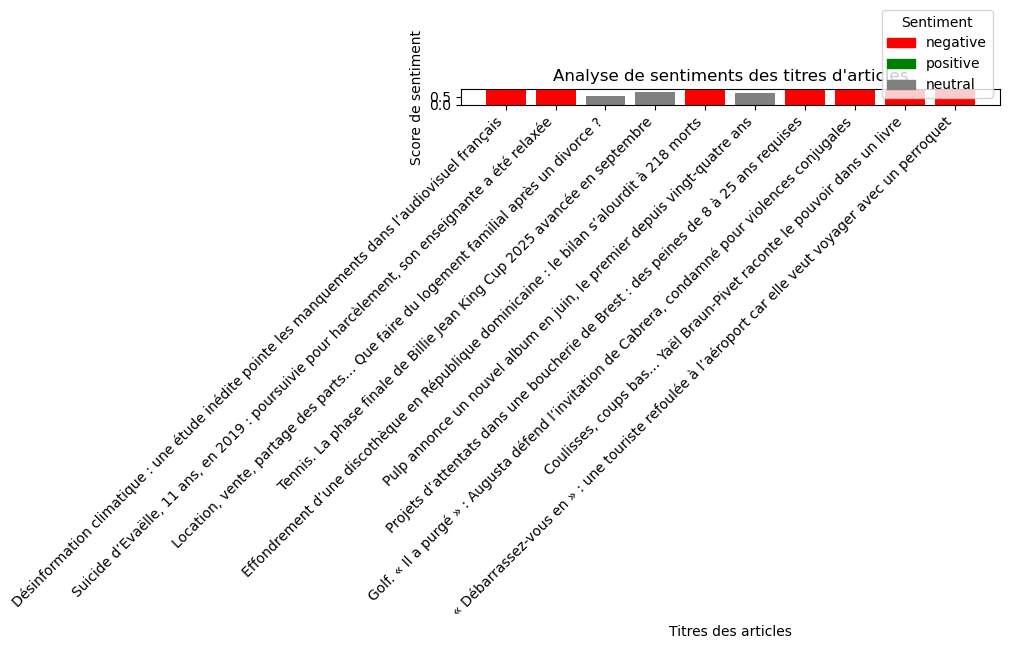

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
colors = {'negative': 'red', 'positive': 'green', 'neutral': 'gray'}


plt.bar(df_articles['titre'], df_articles['score'], color=df_articles['sentiment'].map(colors))


plt.title('Analyse de sentiments des titres d\'articles')
plt.xlabel('Titres des articles')
plt.ylabel('Score de sentiment')


import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color=color, label=label) for label, color in colors.items()]
plt.legend(handles=legend_handles, loc='lower right', title='Sentiment')


plt.xticks(rotation=45, ha="right") 
plt.tight_layout()
plt.show()

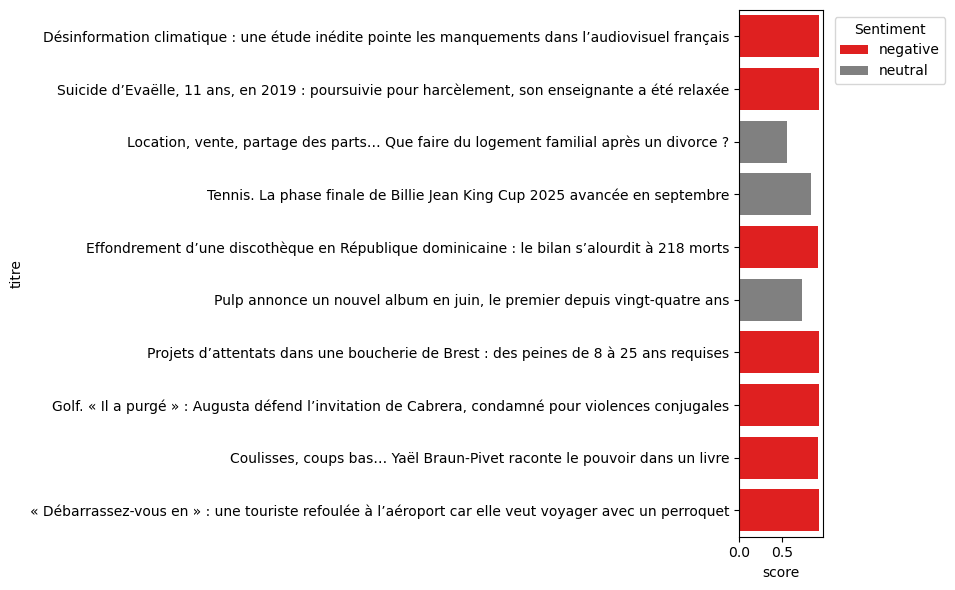

In [54]:
import seaborn as sns

plt.figure(figsize=(10, 6))

palette = {'positive': 'green', 'negative': 'red', 'neutral' : 'gray'}

sns.barplot(x='score', y='titre', hue='sentiment', data=df_articles, palette=palette)

plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()